# (Ford GoBike System Data)
## by (Reem Shaya)

## Preliminary Wrangling

> Ford GoBike is the Bay Area's bike share system, with thousands of bikes at hundreds of station in San Francisco, San Jose and the East Bay.

In [37]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import seaborn as sb
from matplotlib.pyplot import figure
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [38]:
df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')
df_ford.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [39]:
df_ford.describe() #numerical

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [40]:
df_ford.describe(include = 'O')

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,183412,183412,183215,183215,183412,175147,183412
unique,183401,183397,329,329,2,3,2
top,2019-02-07 17:56:08.8970,2019-02-11 18:53:55.0820,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,2,2,3904,4857,163544,130651,166053


In [41]:
df_ford.info()
print(df_ford.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> There are (183412) bike rides in the dataset and 16 features :
- duration_sec (int)
- start_time (str)
- end_time (str)
- start_station_id (float)
- start_station_name (str)
- start_station_latitude (float)
- start_station_longitude (float)
- end_station_id (float)
- end_station_name (str)
- end_station_latitude (float)
- end_station_longitude (float)
- bike_id (int)
- user_type (str)
- member_birth_year (float)
- member_gender (str)
- bike_share_for_all_trip (str)

### What is/are the main feature(s) of interest in your dataset?

> This data is very exciting, and I think that all the features are important to me because they are complementary to each other and when they are interconnected together, I will see clear results and perceptions.. In any case, from my opinion, the most important features are the beginning and end of the journey, the year of birth and the gender of the user because this will explain to me the clients.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> member_birth_year - user_type - age_member - bike_share_for_all_trip- duration_minites - start_of_weekday - start_station_id - end_station_latitude - end_station_longitude


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [42]:
df_ford.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

After I looked at the data types, I found that the (member_birth_year) column is of type float, which is supposed to be int, and time columns of str are supposed to be timedate, and I also found that the columns of Id are of type float and int, which are supposed to be str. So I will convert it like this:

In [43]:
# Convert member_birth_year to int :
df_ford['start_station_id'] = df_ford['start_station_id'].astype(object)

In [44]:
# Convert time columns to int :
df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])
df_ford['end_time'] = pd.to_datetime(df_ford['end_time'])

In [45]:
# Convert ID columns to str :
df_ford['start_station_id'] = df_ford['start_station_id'].astype(str)
df_ford['end_station_id'] = df_ford['end_station_id'].astype(str)
df_ford['bike_id'] = df_ford['bike_id'].astype(str)

In [46]:
df_ford.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [47]:
#I'll check if I have null values or not
df_ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

I noticed that there are a lot of null values, which will negatively affect the viewing of the data, so I will drop them.

In [48]:
df_ford.dropna(inplace=True)

In [49]:
#check
df_ford.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [50]:
df_ford.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes


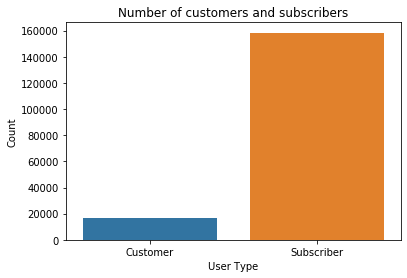

In [51]:
# I want to know how many customers and subscribers?
sb.countplot(data=df_ford, x='user_type');

plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Number of customers and subscribers');

In [52]:
df_ford['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

We conclude here that the number of Subscriber users is much more than customers, as the number of Subscriber users is 158,386 and the number of customers is only 16,566

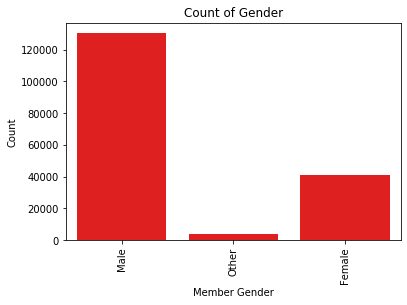

In [53]:
# I want to know the gender of the people in the data?
sb.countplot(data=df_ford, x='member_gender',  color='red');
plt.xticks(rotation=90)

plt.xlabel('Member Gender');
plt.ylabel('Count');
plt.title('Count of Gender');

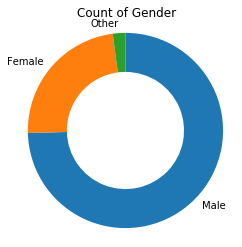

In [54]:
sorted_counts = df_ford['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

plt.title('Count of Gender');

In [55]:
df_ford['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

It seems to us very clearly that the majority are males, followed by females, as the number of males 130500 and the number of females 40805 and 3647 of persons did not specify their gender.

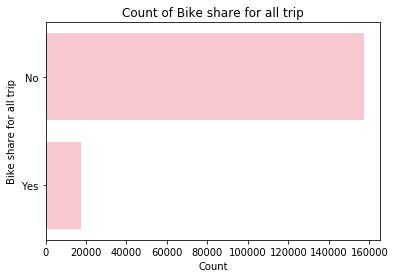

In [56]:
# I want to know bike share for all trips or not?
type_order = df_ford['bike_share_for_all_trip'].value_counts().index
sb.countplot(data=df_ford, y='bike_share_for_all_trip', color='pink', order=type_order);

plt.xlabel('Count');
plt.ylabel('Bike share for all trip');
plt.title('Count of Bike share for all trip');

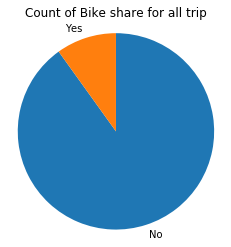

In [57]:
sorted_counts = df_ford['bike_share_for_all_trip'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');
plt.title('Count of Bike share for all trip');

In [58]:
df_ford['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

The percentage of “no” is: 90.0852805% and the percentage of “yes” is: 9.9147195%

The next three forms are all the same data and the same column, but in different forms, and they tell us about the years of birth of the members, and of course it turns out to us that most of the members’ birth years range between 1980 and 2000

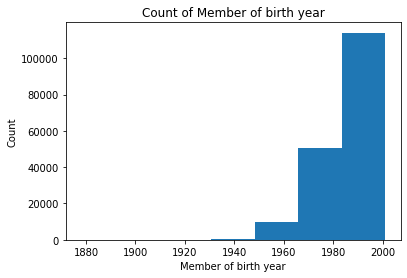

In [59]:
plt.hist(data = df_ford, x = 'member_birth_year', bins = 7)

plt.xlabel('Member of birth year');
plt.ylabel('Count');
plt.title('Count of Member of birth year');

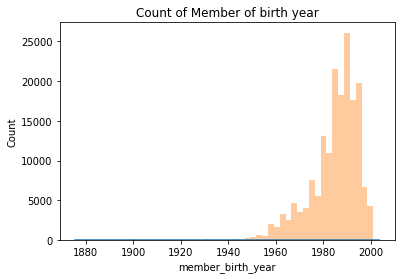

In [60]:
sb.distplot(df_ford['member_birth_year'])
sb.distplot(df_ford['member_birth_year'], kde=False)

plt.ylabel('Count');
plt.title('Count of Member of birth year');

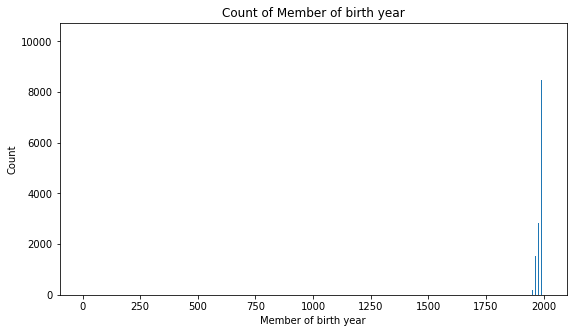

In [61]:
plt.figure(figsize = [20, 5]) 
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, df_ford['member_birth_year'].max()+1/4, 1/4)
plt.hist(data = df_ford, x = 'member_birth_year', bins = bins);

plt.xlabel('Member of birth year');
plt.ylabel('Count');
plt.title('Count of Member of birth year');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, I have made some transformations and modifications that I mentioned earlier in this project.. They are modifying the data type and deleting the missing values.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, it was normally distributed data and easy to handle

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

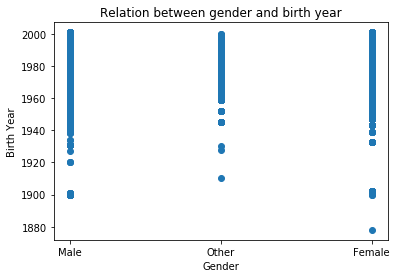

In [62]:
# I want to know the births of each year, are there many females, males, or something else?
plt.scatter(data = df_ford, x = 'member_gender', y = 'member_birth_year');
plt.xlabel('Gender');
plt.ylabel('Birth Year');
plt.title('Relation between gender and birth year');

We note that from 1950 to 2000 there are all genders equally, but the years before 1950 are different and males are many.

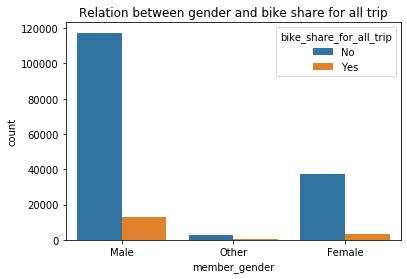

In [63]:
# I want to know bike sharing for both males and females?
sb.countplot(data = df_ford, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.title('Relation between gender and bike share for all trip');

We note that (no) is higher for males, females, and others, and this is very logical and intuitive, because I mentioned earlier that the (no) rate is close to 90%.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I noticed that the data in this type of graph appears more clear as we can connect a larger group of columns and this gives us more correlation of information, such as the relationship of the two stairs for the bike_share_for_all_trip and the member_gender .


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didn't notice because I think the most interesting relationships are the main features.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

I will put a matrix to make it easier for me to see the relationships in addition to seeing the gradient in color to know if it is positive or negative.

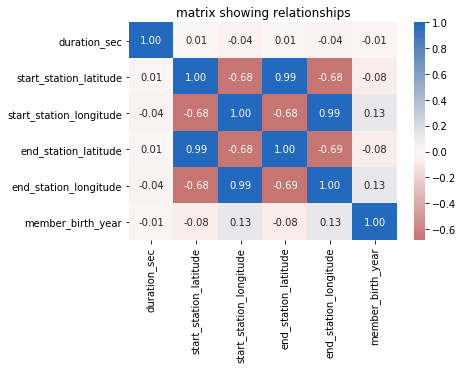

In [64]:
sb.heatmap(df_ford.corr(), annot = True, fmt = '.2f',cmap = 'vlag_r',  center = 0);
plt.title('matrix showing relationships');

Here I put this figure to show the relationships between user type, gender, and time in seconds.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


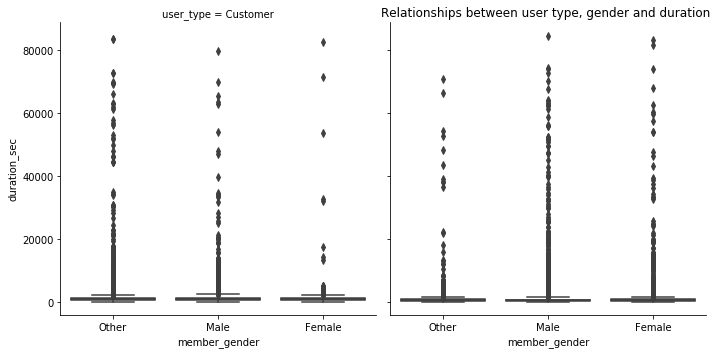

In [66]:
g = sb.FacetGrid(data = df_ford, col = 'user_type', size = 5)
g.map(sb.boxplot, 'member_gender', 'duration_sec')
plt.title('Relationships between user type, gender and duration ');

We note here that the drawing was divided mainly based on the type of user, because it is in the first line of the code, as it was divided into a subscriber and a client.. Then the details were made in each form according to gender (female, male, other) and the y axis represents the time for that for a small drawing This is because we are dealing with seconds.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In fact, no, because for me all the data are very important and interrelated and I would like to focus on all of them in order to give me a clear and good perception.


### Were there any interesting or surprising interactions between features?

> Yes, I was impressed by the relationship between gender, time and type of user when they met each other.. It's excellent data and an enthusiasm to research and explore.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

Perception summary:

1- The number of subscribed users is more than the clients, where the subscribers amount to 158,386 and the clients are 16,566

2- The largest category we have is the category of men, where they represent nearly three quarters of the data.. The number is precisely 130,500, followed by the females whose number is 40,805 and finally the unspecified category and they reach  Only 3647

3- The number of flights is high for people aged between 20 and 60

4- Most of the people whose flights increase are those born in 1980 to 2000 

5- Women whose ages range between 1950 and 1990 are very few and in some years it is not mentioned

In [67]:
df_ford.to_csv('master_clean_bike_system.csv')

In [68]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 326502 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconv